# OPENCV中的GUI特性

## 读取图像

In [96]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

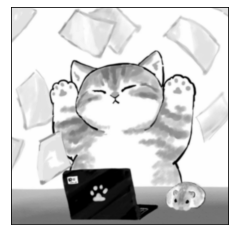

In [6]:
img = cv.imread('/home/god/图片/头像.png',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [7]:
cv.namedWindow('image',cv.WINDOW_NORMAL)
img = cv.imread('/home/god/图片/头像.png')
# img = cv.imread('/home/god/图片/头像.png',0)  #灰度图
emptyImage = np.zeros(img.shape, np.uint8)#创建空图
emptyImage2=cv.cvtColor(img,cv.COLOR_BGR2GRAY) #灰度图
cv.imshow('image',img)
cv.imshow("EmptyImage", emptyImage)  
cv.imshow("EmptyImage2", emptyImage2)   
cv.waitKey(0)
cv.destroyAllWindows()

## 读取视频

In [9]:
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

In [56]:
cap = cv.VideoCapture("/home/god/Projects/rm/Datasets/2蓝方标准曝光.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
#     gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.imshow('frame',frame)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


## 绘图

In [3]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv.circle(img,(447,63), 63, (0,0,255), -1)
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))
cv.imshow("image",img)
cv.waitKey(0)
cv.destroyAllWindows()

## 鼠标作为画笔

In [8]:
events = [i for i in dir(cv) if 'EVENT' in i]
print( events )

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [9]:
# 鼠标回调函数
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1)
# 创建一个黑色的图像，一个窗口，并绑定到窗口的功能
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

In [13]:
drawing = False # 如果按下鼠标，则为真
mode = True # 如果为真，绘制矩形。按 m 键可以切换到曲线
ix,iy = -1,-1
# 鼠标回调函数
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),5,(0,0,255),-1)
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

In [3]:
def nothing(x):
    pass
# 创建一个黑色的图像，一个窗口
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')
# 创建颜色变化的轨迹栏
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)
# 为 ON/OFF 功能创建开关
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    # 得到四条轨迹的当前位置
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv.destroyAllWindows()

# 核心操作

## 图像的基本操作

In [4]:
img = cv.imread('/home/god/图片/头像.png')

In [21]:
px = img[100,100]
blue=img[100,100,0]
img[100,100]=[0,0,0]

Numpy是用于快速数组计算的优化库。因此，简单地访问每个像素值并对其进行修改将非常缓慢，因此不建议使用。

In [31]:
cv.imshow("image",img)
cv.waitKey(0)
cv.destroyAllWindows()

In [24]:
#更好的像素访问和编辑方法：
img.item(10,10,2)
img.itemset((10,10,2),100)

In [27]:
img.shape
img.dtype

dtype('uint8')

### ROI

In [30]:
ball = img[84:440, 110:420]
img[87:443, 90:400] = ball

### 拆分和合并图像通道

In [33]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

In [35]:
b = img[:,:,0]

### 为图像设置边框（填充）

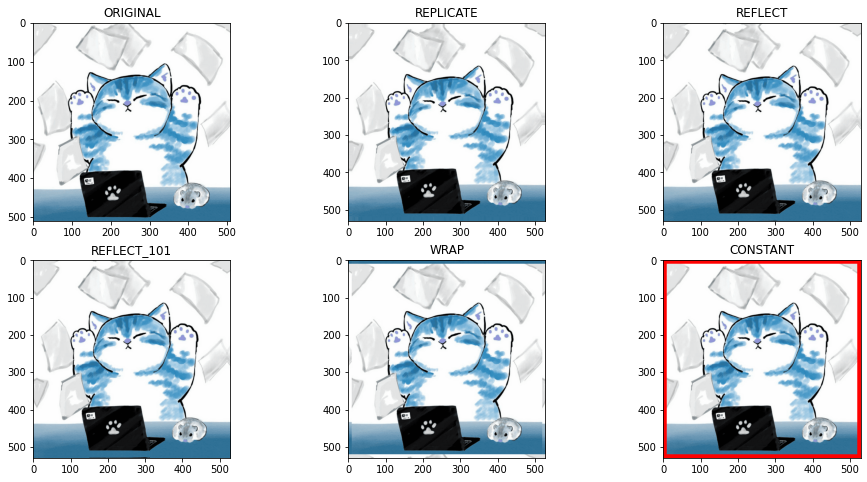

In [38]:
BLUE = [255,0,0]
img1 = cv.imread('/home/god/图片/头像.png')
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.figure(figsize=(16,8))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

## 图像上的算术运算

### 图像加法

In [40]:
x = np.uint8([250])
y = np.uint8([10])
print( cv.add(x,y) ) # 250+10 = 260 => 255
print( x+y )          # 250+10 = 260 % 256 = 4

[[255]]
[4]


### 图像融合

$G(x)=(1-\alpha)f_0(x)+\alpha f_1(x)$

$dst=\alpha·img1+\beta·img2+\gamma$ 

In [48]:
img1 = cv.imread('/home/god/图片/通讯录.png')
img2 = cv.imread('/home/god/图片/通讯录2.png')
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
img = cv.imread('/home/god/图片/头像.png')
img2 = cv.imread('/home/god/图片/头像2.jpeg')
img2 = cv.resize(img2,(509,510),interpolation = cv.INTER_CUBIC)
dst = cv.addWeighted(img,0.7,img2,0.3,0)
cv.imshow('img2',img)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

### 按位运算

In [51]:
# 加载两张图片
img1 = cv.imread('/home/god/图片/头像.png')
img2 = cv.imread('/home/god/图片/通讯录2.png')
# 我想把logo放在左上角，所以我创建了ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# 现在创建logo的掩码，并同时创建其相反掩码
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# 现在将ROI中logo的区域涂黑
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# 仅从logo图像中提取logo区域
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# 将logo放入ROI并修改主图像
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv.imshow('res1',img1_bg)
cv.imshow('res2',img2_fg)
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

### 性能衡量和提升技术

# OPENCV中的图像处理

## 改变颜色空间

`cvtColor(input_image, flag)`

对于BGR→灰度转换，我们使用标志cv.COLOR_BGR2GRAY。类似地，对于BGR→HSV，我们使用标志cv.COLOR_BGR2HSV。要获取其他标记，只需在Python终端中运行以下命令:

In [53]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
flags

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

## 对象追踪

In [57]:
cap = cv.VideoCapture("/home/god/Projects/rm/Datasets/2蓝方标准曝光.mp4")
while(1):
    # 读取帧
    _, frame = cap.read()
    # 转换颜色空间 BGR 到 HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # 定义HSV中蓝色的范围
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # 设置HSV的阈值使得只取蓝色
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # 将掩膜和图像逐像素相加
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

# 图像的几何变换 

## 变换

### 缩放

In [100]:
img = cv.imread('/home/god/图片/头像.png')
res = cv.resize(img,None,fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC)
#fx,fy为倍数
cv.imshow('res1',res)
cv.waitKey(0)
cv.destroyAllWindows()

In [101]:
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
cv.imshow('res2',res)
cv.waitKey(0)
cv.destroyAllWindows()

### 平移 

平移是物体位置的移动。如果您知道在(x,y)方向上的位移，则将其设为$(t_x,t_y)$，你可以创建转换矩阵M，如下所示：
$M=\left[\begin{array} \\1 \ 0 \ t_x \\ 0 \ 1\ t_y \\ \end{array}\right]$

In [114]:
img = cv.imread('/home/god/图片/头像.png',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

### 旋转 

In [118]:
img = cv.imread('/home/god/图片/头像.png')
rows,cols,rgb = img.shape
# cols-1 和 rows-1 是坐标限制
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('res2',dst)
cv.waitKey(0)
cv.destroyAllWindows()

### 仿射变换 

In [ ]:
img = cv.imread('drawing.png')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

### 透视变换

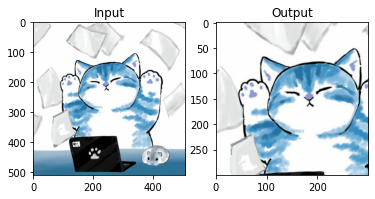

In [119]:
img = cv.imread('/home/god/图片/头像.png')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## 图像阈值 

### 简单阈值

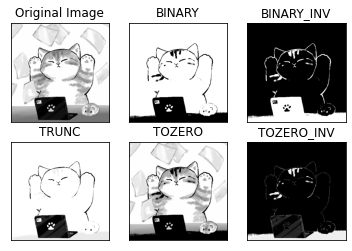

In [121]:
img = cv.imread('/home/god/图片/头像.png',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 自适应阈值

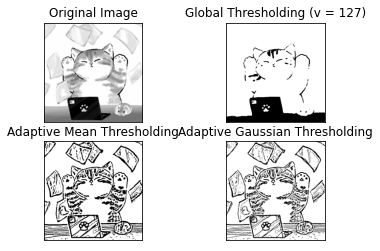

In [125]:
img = cv.imread('/home/god/图片/头像.png',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Otsu的二值化

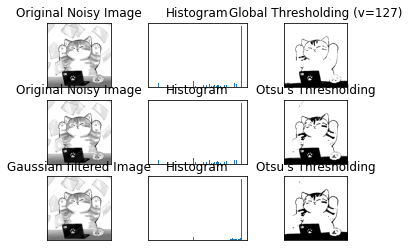

In [126]:
img = cv.imread('/home/god/图片/头像.png',0)
# 全局阈值
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu阈值
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# 高斯滤波后再采用Otsu阈值
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# 绘制所有图像及其直方图
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [117]:
img.shape

(510, 509, 3)

In [65]:
import math
from math import sqrt
50*math.sqrt(5)

111.80339887498948

In [59]:
math.pi

3.141592653589793

In [62]:
b=-3/(2*math.pi)

In [63]:
a=0.75+math.sqrt(3)/6

In [66]:
(1-a)**2+(sqrt(3)/2-a-math.pi*b/6)**2+(1/2-a-math.pi*b/3)**2

0.008974596215561346

In [67]:
(3+2*sqrt(3))*9/(13*math.pi*math.pi)

0.4534272185746878

In [69]:
(93/26+18*sqrt(3)/13)/6

0.9958578786697408

In [77]:
from math import log
(-log(3)-7*log(2))*3/(4*math.pi)

-1.4206112652259657

In [83]:
b=-3*log(2)/math.pi
math.exp((log(3)/2-math.pi*b/2)/3)

1.6983813295649528

In [90]:
la=log(3)/6+log(2)/2
# la=log(1.0699)

In [91]:
la**2+(log(sqrt(3)/2)-la-math.pi*b/6)**2+(log(2)+la+math.pi*b/3)**2

0.6680043442064627

In [95]:
def f(x):
    return (x**4+3*x**3-1)*x*x
list=[-1,0,1,2,3]
sum=0
for i in list:
    sum+=f(i)
sum

4665